In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
crop_dataset = pd.read_csv("C:\\Users\\vikra\\Downloads\\Crop_recommendation.csv")

In [3]:
crop_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop_dataset['label'].nunique()

22

orrelation analysis of each feature with eachother

<AxesSubplot:>

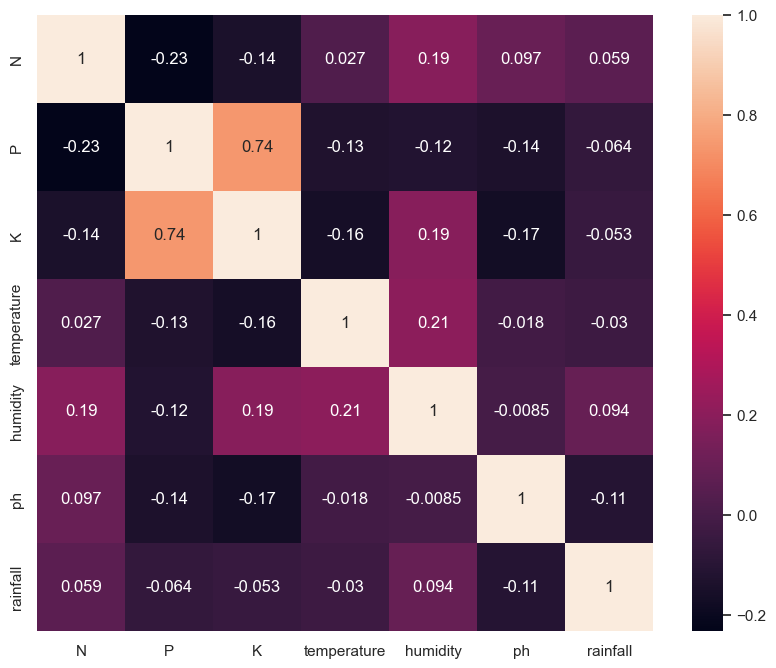

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

crop_dataset_corr = crop_dataset.corr()
sns.set(rc={'figure.figsize': (10, 8)})
sns.heatmap(crop_dataset_corr, annot = True, square = True)

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ohe = OneHotEncoder()

crop_dataset_encoded = pd.DataFrame(ohe.fit_transform(crop_dataset[['label']]).toarray())

crop_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2200 non-null   float64
 1   1       2200 non-null   float64
 2   2       2200 non-null   float64
 3   3       2200 non-null   float64
 4   4       2200 non-null   float64
 5   5       2200 non-null   float64
 6   6       2200 non-null   float64
 7   7       2200 non-null   float64
 8   8       2200 non-null   float64
 9   9       2200 non-null   float64
 10  10      2200 non-null   float64
 11  11      2200 non-null   float64
 12  12      2200 non-null   float64
 13  13      2200 non-null   float64
 14  14      2200 non-null   float64
 15  15      2200 non-null   float64
 16  16      2200 non-null   float64
 17  17      2200 non-null   float64
 18  18      2200 non-null   float64
 19  19      2200 non-null   float64
 20  20      2200 non-null   float64
 21  21      2200 non-null   float64
dtype

In [8]:
X = crop_dataset.iloc[:, :-1]
y = crop_dataset_encoded

In [9]:
print(y.shape)
print(X.shape)

(2200, 22)
(2200, 7)


Splitting training and testing data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [11]:
X.shape

(2200, 7)

Scaling Data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Evaluations

I am making 8 ANN model. Each has a differenet combination of activation function and loss function.

Activation function:

tanh
relu
sigmoid
softmax
Loss function:

categorical crossentropy
categorical hinge

Model 1

In [13]:
#creating neural network

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model1.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model1.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 3s 10ms/step - loss: 2.7181 - accuracy: 0.2152 - val_loss: 2.4106 - val_accuracy: 0.3545
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 2.1542 - accuracy: 0.4659 - val_loss: 1.9395 - val_accuracy: 0.5795
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 1.7354 - accuracy: 0.6508 - val_loss: 1.5742 - val_accuracy: 0.6966
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 1.4114 - accuracy: 0.7083 - val_loss: 1.2971 - val_accuracy: 0.7466
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 1.1698 - accuracy: 0.7659 - val_loss: 1.0918 - val_accuracy: 0.7920
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9912 - accuracy: 0.8167 - val_loss: 0.9371 - val_accuracy: 0.8295
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8562 - accuracy: 0.8439 - val_loss: 0.8176 - val_accuracy: 0.853

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0624 - accuracy: 0.9917 - val_loss: 0.0790 - val_accuracy: 0.9773
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0612 - accuracy: 0.9886 - val_loss: 0.0767 - val_accuracy: 0.9818
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0598 - accuracy: 0.9909 - val_loss: 0.0767 - val_accuracy: 0.9750
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0580 - accuracy: 0.9909 - val_loss: 0.0752 - val_accuracy: 0.9795
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0562 - accuracy: 0.9924 - val_loss: 0.0741 - val_accuracy: 0.9807
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0551 - accuracy: 0.9909 - val_loss: 0.0741 - val_accuracy: 0.9761
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0539 - accuracy: 0.9917 - val_loss: 0.0725 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0220 - accuracy: 0.9955 - val_loss: 0.0495 - val_accuracy: 0.9830
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0217 - accuracy: 0.9947 - val_loss: 0.0469 - val_accuracy: 0.9807
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0212 - accuracy: 0.9955 - val_loss: 0.0466 - val_accuracy: 0.9852
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.0461 - val_accuracy: 0.9852
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0.0457 - val_ac

Model 2

In [14]:
#creating neural network

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model2.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model2.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 3s 9ms/step - loss: 1.0928 - accuracy: 0.2326 - val_loss: 1.0287 - val_accuracy: 0.4295
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9998 - accuracy: 0.5439 - val_loss: 0.9816 - val_accuracy: 0.6318
Epoch 3/200
132/132 [==============================] - 1s 7ms/step - loss: 0.9686 - accuracy: 0.6924 - val_loss: 0.9625 - val_accuracy: 0.6784
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9522 - accuracy: 0.7273 - val_loss: 0.9497 - val_accuracy: 0.7341
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9397 - accuracy: 0.7985 - val_loss: 0.9384 - val_accuracy: 0.7705
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9294 - accuracy: 0.8136 - val_loss: 0.9297 - val_accuracy: 0.7955
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9210 - accuracy: 0.8273 - val_loss: 0.9216 - val_accuracy: 0.8295

Epoch 58/200
132/132 [==============================] - 1s 5ms/step - loss: 0.3901 - accuracy: 0.9523 - val_loss: 0.4039 - val_accuracy: 0.9432
Epoch 59/200
132/132 [==============================] - 1s 7ms/step - loss: 0.3831 - accuracy: 0.9500 - val_loss: 0.3973 - val_accuracy: 0.9443
Epoch 60/200
132/132 [==============================] - 1s 7ms/step - loss: 0.3766 - accuracy: 0.9538 - val_loss: 0.3902 - val_accuracy: 0.9432
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3698 - accuracy: 0.9545 - val_loss: 0.3837 - val_accuracy: 0.9432
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3635 - accuracy: 0.9553 - val_loss: 0.3772 - val_accuracy: 0.9455
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3570 - accuracy: 0.9530 - val_loss: 0.3712 - val_accuracy: 0.9432
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.3513 - accuracy: 0.9538 - val_loss: 0.3643 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1716 - accuracy: 0.9795 - val_loss: 0.1904 - val_accuracy: 0.9670
Epoch 116/200
132/132 [==============================] - 1s 7ms/step - loss: 0.1694 - accuracy: 0.9803 - val_loss: 0.1886 - val_accuracy: 0.9670
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1678 - accuracy: 0.9803 - val_loss: 0.1869 - val_accuracy: 0.9670
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1653 - accuracy: 0.9803 - val_loss: 0.1854 - val_accuracy: 0.9682
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1633 - accuracy: 0.9803 - val_loss: 0.1837 - val_accuracy: 0.9670
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1622 - accuracy: 0.9795 - val_loss: 0.1825 - val_accuracy: 0.9648
Epoch 121/200
132/132 [==============================] - 1s 8ms/step - loss: 0.1598 - accuracy: 0.9811 - val_loss: 0.1810 - val_ac

Model 3

In [15]:
#creating neural network

model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model3.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model3.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model3.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 3s 10ms/step - loss: 2.8546 - accuracy: 0.1750 - val_loss: 2.5625 - val_accuracy: 0.3080
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 2.2709 - accuracy: 0.4311 - val_loss: 2.0327 - val_accuracy: 0.5511
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 1.7698 - accuracy: 0.6182 - val_loss: 1.5845 - val_accuracy: 0.6920
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 1.3713 - accuracy: 0.7455 - val_loss: 1.2379 - val_accuracy: 0.7625
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 1.0772 - accuracy: 0.7909 - val_loss: 0.9842 - val_accuracy: 0.8239
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8640 - accuracy: 0.8333 - val_loss: 0.7989 - val_accuracy: 0.8614
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.7079 - accuracy: 0.8720 - val_loss: 0.6670 - val_accuracy: 0.887

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0478 - accuracy: 0.9894 - val_loss: 0.0615 - val_accuracy: 0.9830
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0466 - accuracy: 0.9917 - val_loss: 0.0594 - val_accuracy: 0.9852
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0456 - accuracy: 0.9917 - val_loss: 0.0586 - val_accuracy: 0.9852
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0448 - accuracy: 0.9902 - val_loss: 0.0584 - val_accuracy: 0.9852
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0438 - accuracy: 0.9917 - val_loss: 0.0587 - val_accuracy: 0.9841
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0430 - accuracy: 0.9924 - val_loss: 0.0591 - val_accuracy: 0.9841
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0420 - accuracy: 0.9909 - val_loss: 0.0578 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0180 - accuracy: 0.9962 - val_loss: 0.0399 - val_accuracy: 0.9864
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0176 - accuracy: 0.9970 - val_loss: 0.0402 - val_accuracy: 0.9864
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0175 - accuracy: 0.9962 - val_loss: 0.0390 - val_accuracy: 0.9852
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.0403 - val_accuracy: 0.9864
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0171 - accuracy: 0.9970 - val_loss: 0.0396 - val_accuracy: 0.9852
Epoch 120/200
132/132 [==============================] - 1s 5ms/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.0396 - val_accuracy: 0.9841
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0166 - accuracy: 0.9970 - val_loss: 0.0395 - val_ac

Model 4

In [16]:
#creating neural network

model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model4.add(tf.keras.layers.Dense(units = 22, activation = 'sigmoid'))
model4.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model4.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 3s 9ms/step - loss: 1.0779 - accuracy: 0.1348 - val_loss: 1.0318 - val_accuracy: 0.2500
Epoch 2/200
132/132 [==============================] - 1s 7ms/step - loss: 1.0114 - accuracy: 0.3773 - val_loss: 0.9952 - val_accuracy: 0.5182
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9841 - accuracy: 0.6083 - val_loss: 0.9748 - val_accuracy: 0.7034
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9662 - accuracy: 0.7348 - val_loss: 0.9596 - val_accuracy: 0.7057
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9493 - accuracy: 0.7379 - val_loss: 0.9433 - val_accuracy: 0.7420
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9315 - accuracy: 0.7538 - val_loss: 0.9258 - val_accuracy: 0.7523
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9115 - accuracy: 0.7856 - val_loss: 0.9058 - val_accuracy: 0.7875

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1585 - accuracy: 0.9803 - val_loss: 0.1700 - val_accuracy: 0.9727
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1551 - accuracy: 0.9811 - val_loss: 0.1664 - val_accuracy: 0.9784
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1521 - accuracy: 0.9811 - val_loss: 0.1638 - val_accuracy: 0.9795
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1489 - accuracy: 0.9788 - val_loss: 0.1616 - val_accuracy: 0.9750
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1457 - accuracy: 0.9780 - val_loss: 0.1587 - val_accuracy: 0.9750
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1429 - accuracy: 0.9795 - val_loss: 0.1561 - val_accuracy: 0.9739
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.1398 - accuracy: 0.9818 - val_loss: 0.1541 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0685 - accuracy: 0.9856 - val_loss: 0.0932 - val_accuracy: 0.9807
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0674 - accuracy: 0.9871 - val_loss: 0.0925 - val_accuracy: 0.9795
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0671 - accuracy: 0.9871 - val_loss: 0.0923 - val_accuracy: 0.9807
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0666 - accuracy: 0.9871 - val_loss: 0.0916 - val_accuracy: 0.9807
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.9871 - val_loss: 0.0908 - val_accuracy: 0.9818
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0653 - accuracy: 0.9871 - val_loss: 0.0906 - val_accuracy: 0.9795
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0644 - accuracy: 0.9879 - val_loss: 0.0904 - val_ac

Model 5

In [17]:
#creating neural network

model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model5.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model5.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model5.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 2s 9ms/step - loss: 2.7551 - accuracy: 0.2667 - val_loss: 2.4424 - val_accuracy: 0.4114
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 2.1398 - accuracy: 0.5152 - val_loss: 1.9409 - val_accuracy: 0.5841
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 1.7039 - accuracy: 0.6924 - val_loss: 1.5727 - val_accuracy: 0.7250
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 1.3850 - accuracy: 0.7712 - val_loss: 1.2964 - val_accuracy: 0.7841
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 1.1487 - accuracy: 0.8167 - val_loss: 1.0879 - val_accuracy: 0.8102
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9703 - accuracy: 0.8470 - val_loss: 0.9287 - val_accuracy: 0.8284
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8344 - accuracy: 0.8538 - val_loss: 0.8085 - val_accuracy: 0.8523

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0667 - accuracy: 0.9871 - val_loss: 0.0814 - val_accuracy: 0.9818
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0646 - accuracy: 0.9871 - val_loss: 0.0803 - val_accuracy: 0.9807
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0638 - accuracy: 0.9856 - val_loss: 0.0792 - val_accuracy: 0.9807
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0618 - accuracy: 0.9886 - val_loss: 0.0779 - val_accuracy: 0.9818
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0605 - accuracy: 0.9871 - val_loss: 0.0757 - val_accuracy: 0.9795
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0590 - accuracy: 0.9894 - val_loss: 0.0753 - val_accuracy: 0.9818
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0578 - accuracy: 0.9886 - val_loss: 0.0741 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0511 - val_accuracy: 0.9841
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0251 - accuracy: 0.9939 - val_loss: 0.0504 - val_accuracy: 0.9852
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0243 - accuracy: 0.9932 - val_loss: 0.0520 - val_accuracy: 0.9852
Epoch 118/200
132/132 [==============================] - 1s 9ms/step - loss: 0.0241 - accuracy: 0.9939 - val_loss: 0.0499 - val_accuracy: 0.9830
Epoch 119/200
132/132 [==============================] - 1s 10ms/step - loss: 0.0238 - accuracy: 0.9947 - val_loss: 0.0496 - val_accuracy: 0.9830
Epoch 120/200
132/132 [==============================] - 2s 13ms/step - loss: 0.0234 - accuracy: 0.9947 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 121/200
132/132 [==============================] - 2s 17ms/step - loss: 0.0234 - accuracy: 0.9947 - val_loss: 0.0500 - val

Model 6

In [18]:
#creating neural network

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Dense(units = 22, activation = 'tanh'))
model6.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model6.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model6.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 2s 9ms/step - loss: 1.0270 - accuracy: 0.1879 - val_loss: 1.0086 - val_accuracy: 0.3125
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9974 - accuracy: 0.4955 - val_loss: 0.9884 - val_accuracy: 0.5852
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9783 - accuracy: 0.6045 - val_loss: 0.9665 - val_accuracy: 0.6511
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9502 - accuracy: 0.6727 - val_loss: 0.9296 - val_accuracy: 0.6830
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9070 - accuracy: 0.6939 - val_loss: 0.8806 - val_accuracy: 0.7000
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8456 - accuracy: 0.7106 - val_loss: 0.8133 - val_accuracy: 0.7034
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.7717 - accuracy: 0.7091 - val_loss: 0.7409 - val_accuracy: 0.7432

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0734 - accuracy: 0.9856 - val_loss: 0.0979 - val_accuracy: 0.9682
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0718 - accuracy: 0.9848 - val_loss: 0.0964 - val_accuracy: 0.9693
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0703 - accuracy: 0.9848 - val_loss: 0.0948 - val_accuracy: 0.9693
Epoch 61/200
132/132 [==============================] - 1s 7ms/step - loss: 0.0689 - accuracy: 0.9871 - val_loss: 0.0939 - val_accuracy: 0.9705
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0674 - accuracy: 0.9856 - val_loss: 0.0933 - val_accuracy: 0.9693
Epoch 63/200
132/132 [==============================] - 1s 5ms/step - loss: 0.0662 - accuracy: 0.9864 - val_loss: 0.0920 - val_accuracy: 0.9682
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0647 - accuracy: 0.9864 - val_loss: 0.0918 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0317 - accuracy: 0.9909 - val_loss: 0.0659 - val_accuracy: 0.9727
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.0664 - val_accuracy: 0.9727
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0311 - accuracy: 0.9909 - val_loss: 0.0644 - val_accuracy: 0.9727
Epoch 118/200
132/132 [==============================] - 1s 5ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.0651 - val_accuracy: 0.9705
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0647 - val_accuracy: 0.9716
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0650 - val_accuracy: 0.9727
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0300 - accuracy: 0.9917 - val_loss: 0.0648 - val_ac

Model 7

In [19]:
#creating neural network

model7 = tf.keras.models.Sequential()
model7.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model7.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model7.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

model7.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 3s 9ms/step - loss: 2.8748 - accuracy: 0.1886 - val_loss: 2.5865 - val_accuracy: 0.2943
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 2.3293 - accuracy: 0.4205 - val_loss: 2.0812 - val_accuracy: 0.5205
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 1.8456 - accuracy: 0.5485 - val_loss: 1.6368 - val_accuracy: 0.6443
Epoch 4/200
132/132 [==============================] - 1s 6ms/step - loss: 1.4276 - accuracy: 0.6932 - val_loss: 1.2636 - val_accuracy: 0.7500
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 1.0976 - accuracy: 0.7826 - val_loss: 0.9822 - val_accuracy: 0.8205
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8556 - accuracy: 0.8477 - val_loss: 0.7836 - val_accuracy: 0.8568
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.6875 - accuracy: 0.8833 - val_loss: 0.6418 - val_accuracy: 0.8761

Epoch 58/200
132/132 [==============================] - 1s 5ms/step - loss: 0.0450 - accuracy: 0.9879 - val_loss: 0.0657 - val_accuracy: 0.9830
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0435 - accuracy: 0.9902 - val_loss: 0.0638 - val_accuracy: 0.9841
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0411 - accuracy: 0.9932 - val_loss: 0.0682 - val_accuracy: 0.9784
Epoch 61/200
132/132 [==============================] - 1s 5ms/step - loss: 0.0416 - accuracy: 0.9894 - val_loss: 0.0641 - val_accuracy: 0.9807
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0409 - accuracy: 0.9924 - val_loss: 0.0629 - val_accuracy: 0.9841
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0397 - accuracy: 0.9939 - val_loss: 0.0616 - val_accuracy: 0.9841
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0391 - accuracy: 0.9947 - val_loss: 0.0607 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 5ms/step - loss: 0.0177 - accuracy: 0.9970 - val_loss: 0.0486 - val_accuracy: 0.9864
Epoch 116/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0177 - accuracy: 0.9962 - val_loss: 0.0497 - val_accuracy: 0.9875
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0171 - accuracy: 0.9977 - val_loss: 0.0500 - val_accuracy: 0.9875
Epoch 118/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0173 - accuracy: 0.9962 - val_loss: 0.0492 - val_accuracy: 0.9875
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0168 - accuracy: 0.9970 - val_loss: 0.0496 - val_accuracy: 0.9875
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0165 - accuracy: 0.9970 - val_loss: 0.0497 - val_accuracy: 0.9864
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 0.0493 - val_ac

Model 8

In [20]:
#creating neural network

model8 = tf.keras.models.Sequential()
model8.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))
model8.add(tf.keras.layers.Dense(units = 22, activation = 'softmax'))
model8.compile(optimizer =  'adam', loss = 'categorical_hinge', metrics = ["accuracy"])

model8.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 10)

Epoch 1/200
132/132 [==============================] - 2s 8ms/step - loss: 1.0263 - accuracy: 0.1288 - val_loss: 1.0100 - val_accuracy: 0.2386
Epoch 2/200
132/132 [==============================] - 1s 6ms/step - loss: 1.0025 - accuracy: 0.3356 - val_loss: 0.9937 - val_accuracy: 0.4761
Epoch 3/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9816 - accuracy: 0.5280 - val_loss: 0.9657 - val_accuracy: 0.6034
Epoch 4/200
132/132 [==============================] - 1s 5ms/step - loss: 0.9524 - accuracy: 0.6492 - val_loss: 0.9358 - val_accuracy: 0.6341
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.9065 - accuracy: 0.6712 - val_loss: 0.8746 - val_accuracy: 0.6568
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.8231 - accuracy: 0.6856 - val_loss: 0.7841 - val_accuracy: 0.6773
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.7253 - accuracy: 0.7106 - val_loss: 0.6925 - val_accuracy: 0.7193

Epoch 58/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0596 - accuracy: 0.9879 - val_loss: 0.0824 - val_accuracy: 0.9716
Epoch 59/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0581 - accuracy: 0.9886 - val_loss: 0.0807 - val_accuracy: 0.9750
Epoch 60/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0571 - accuracy: 0.9879 - val_loss: 0.0802 - val_accuracy: 0.9750
Epoch 61/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0560 - accuracy: 0.9879 - val_loss: 0.0798 - val_accuracy: 0.9727
Epoch 62/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0552 - accuracy: 0.9886 - val_loss: 0.0787 - val_accuracy: 0.9727
Epoch 63/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0541 - accuracy: 0.9886 - val_loss: 0.0776 - val_accuracy: 0.9750
Epoch 64/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9879 - val_loss: 0.0760 - val_accuracy:

Epoch 115/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0555 - val_accuracy: 0.9784
Epoch 116/200
132/132 [==============================] - 1s 7ms/step - loss: 0.0258 - accuracy: 0.9932 - val_loss: 0.0559 - val_accuracy: 0.9784
Epoch 117/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0258 - accuracy: 0.9932 - val_loss: 0.0548 - val_accuracy: 0.9773
Epoch 118/200
132/132 [==============================] - 1s 7ms/step - loss: 0.0254 - accuracy: 0.9932 - val_loss: 0.0543 - val_accuracy: 0.9784
Epoch 119/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0252 - accuracy: 0.9932 - val_loss: 0.0537 - val_accuracy: 0.9784
Epoch 120/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0247 - accuracy: 0.9939 - val_loss: 0.0544 - val_accuracy: 0.9773
Epoch 121/200
132/132 [==============================] - 1s 6ms/step - loss: 0.0242 - accuracy: 0.9939 - val_loss: 0.0532 - val_ac

Visualising Model performance and comparing each model

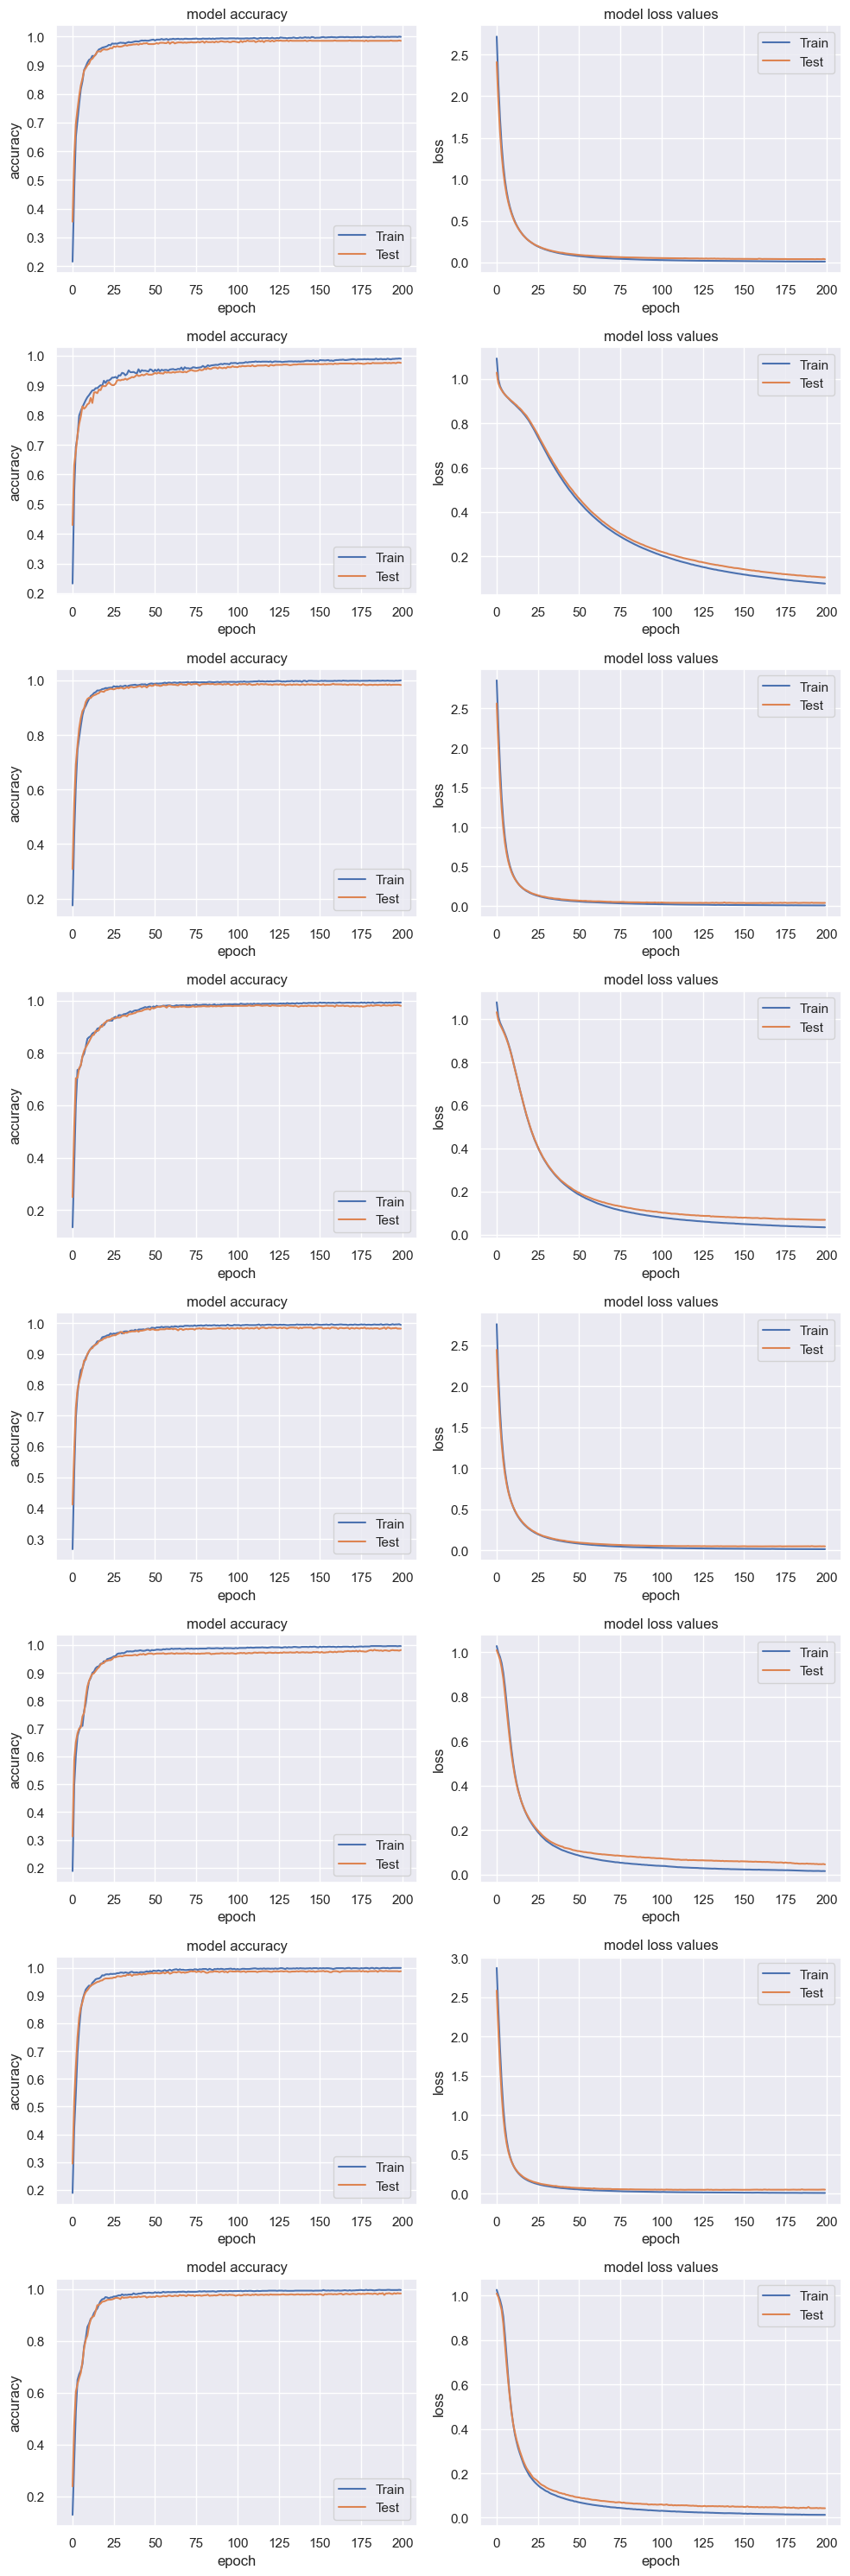

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axis = plt.subplots(8, 2, figsize=(10,30))


models = [model1, model2, model3, model4, model5, model6, model7, model8]
i = 0

for i in range(8):
    history = models[i].history
    
    #accuracy curve
    axis[i, 0].plot(history.epoch, history.history['accuracy'], label = 'Train')
    axis[i, 0].plot(history.epoch, history.history['val_accuracy'], label = 'Test')
    axis[i, 0].legend(loc = 'lower right')
    axis[i, 0].set_title('model accuracy')
    axis[i, 0].set(xlabel = 'epoch', ylabel = 'accuracy')
    
    #loss curve
    axis[i, 1].plot(history.epoch, history.history['loss'], label ='Train')
    axis[i, 1].plot(history.epoch, history.history['val_loss'], label ='Test')
    axis[i, 1].legend(loc = 'upper right')
    axis[i, 1].set_title('model loss values')
    axis[i, 1].set(xlabel = 'epoch', ylabel = 'loss')
    
    
figure.tight_layout()
plt.show()

Model Numerical performance

In [22]:
i = 1

for model in models:
    print(f"Model {i}:")
    print(f"Training accuracy: {model.history.history['accuracy'][-1]}")
    print(f"Testing accuracy: {model.history.history['val_accuracy'][-1]}")
    print(f"Difference: {model.history.history['val_accuracy'][-1] - model.history.history['accuracy'][-1]}")
    print()
    i += 1

Model 1:
Training accuracy: 0.9992424249649048
Testing accuracy: 0.9852272868156433
Difference: -0.014015138149261475

Model 2:
Training accuracy: 0.9901515245437622
Testing accuracy: 0.9761363863945007
Difference: -0.014015138149261475

Model 3:
Training accuracy: 1.0
Testing accuracy: 0.9829545617103577
Difference: -0.017045438289642334

Model 4:
Training accuracy: 0.9924242496490479
Testing accuracy: 0.9795454740524292
Difference: -0.012878775596618652

Model 5:
Training accuracy: 0.9939393997192383
Testing accuracy: 0.9818181991577148
Difference: -0.012121200561523438

Model 6:
Training accuracy: 0.9962121248245239
Testing accuracy: 0.9818181991577148
Difference: -0.014393925666809082

Model 7:
Training accuracy: 0.9992424249649048
Testing accuracy: 0.987500011920929
Difference: -0.01174241304397583

Model 8:
Training accuracy: 0.9962121248245239
Testing accuracy: 0.9829545617103577
Difference: -0.01325756311416626



In [23]:
# Ask user to provide input data
print("Please provide input data:")
N, P, K, temperature, humidity, ph, rainfall = input().split()
input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

# Scale the input data
input_data = sc.transform(input_data)

# Get predicted crop label for each model
pred1 = model1.predict(input_data)
pred2 = model2.predict(input_data)
pred3 = model3.predict(input_data)
pred4 = model4.predict(input_data)
pred5 = model5.predict(input_data)
pred6 = model6.predict(input_data)
pred7 = model7.predict(input_data)
pred8 = model8.predict(input_data)

# Print the predicted crop label for each model
print("Predicted crop label using Model 1:", ohe.inverse_transform(pred1))
print("Predicted crop label using Model 2:", ohe.inverse_transform(pred2))
print("Predicted crop label using Model 3:", ohe.inverse_transform(pred3))
print("Predicted crop label using Model 4:", ohe.inverse_transform(pred4))
print("Predicted crop label using Model 5:", ohe.inverse_transform(pred5))
print("Predicted crop label using Model 6:", ohe.inverse_transform(pred6))
print("Predicted crop label using Model 7:", ohe.inverse_transform(pred7))
print("Predicted crop label using Model 8:", ohe.inverse_transform(pred8))


Please provide input data:
35 43 21 19.2 44.7 6.7 73.5


C:\Users\vikra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
Predicted crop label using Model 1: [['kidneybeans']]
Predicted crop label using Model 2: [['maize']]
Predicted crop label using Model 3: [['kidneybeans']]
Predicted crop label using Model 4: [['kidneybeans']]
Predicted crop label using Model 5: [['kidneybeans']]
Predicted crop label using Model 6: [['mothbeans']]
Predicted crop label using Model 7: [['kidneybeans']]
Predicted crop label using Model 8: [['kidneybeans']]
